In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Integrales

In [2]:
def f(x):
    return 1/np.sqrt(x)

a = 0
b = 1
dxdu = (b-a)/2
const = (a+b)/2

u,w = np.polynomial.legendre.leggauss(200)
print("int x^{-1/2} dx from 0 to 1: ", f(dxdu*u+const)*dxdu @ w)

int x^{-1/2} dx from 0 to 1:  1.9956574039366528


In [3]:
def g(x):
    return np.log(x)

u,w = np.polynomial.laguerre.laggauss(150)
print("int e^{-x} ln(x) dx from 0 to inf: ", np.log(u) @ w)

int e^{-x} ln(x) dx from 0 to inf:  -0.573009317545127


In [4]:
x = np.arange(1e-4,1e5,0.1)
f = np.sin(x)/x
print("int sin(x)/x dx from 0 to inf: ", sum((f[:-1] + f[1:])/2)*0.1)

int sin(x)/x dx from 0 to inf:  1.5707062544414354


# Fourier

In [5]:
X,Y = pd.read_pickle("ex1.gz").T.values

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

Calcule la transformada rápida de Fourier para la función de la Tarea 3 (D) en el intervalo [0,4]

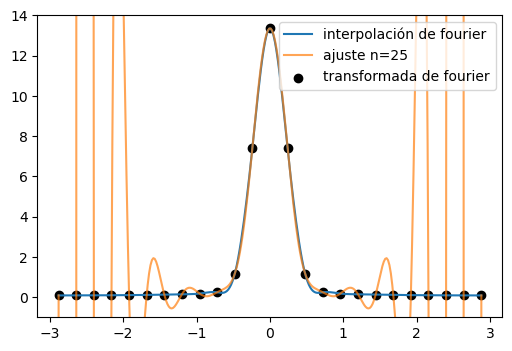

In [7]:
plt.figure(dpi=100)

# ajustar curva a los datos

def f(x,a,b,c):
    return  a/((x-b)**2+c)**7

beta,_ = curve_fit(f,X,Y)

# fourier de la función

x1 = np.linspace(0,4,25)
dx1 = x1[1]-x1[0]
y1 = f(x1,*beta)

freq = np.fft.fftfreq(len(x1), dx1)
F = abs(np.fft.fft(y1))

F_interp = interp1d(freq,F,kind="cubic")
freq_interp = np.linspace(freq.min(),freq.max(),300)

plt.scatter(freq,F,color="k",label="transformada de fourier")
plt.plot(freq_interp,F_interp(freq_interp),label="interpolación de fourier")

## ajuste exacto de grado n = 25

FREQ = np.vander(freq)
beta = np.linalg.pinv(FREQ) @ F
plt.plot(freq_interp,np.vander(freq_interp,len(x1)) @ beta, label="ajuste n=25",alpha=0.7)

plt.ylim(-1,14)
plt.legend()